In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn  import preprocessing
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression as lr
from scipy import stats


In [74]:
# df1 = pd.read_csv(r'C:\BeCode\LocalRepos\documents\real_estate_data_1to3.csv')
# df2 = pd.read_csv(r'C:\BeCode\LocalRepos\documents\real_estate_data_3to5.csv')
# df = pd.concat([df1, df2])

df = pd.read_csv(r'C:\BeCode\LocalRepos\documents\real_estate_data_25to29.csv')

In [75]:
df.head(10)

,ID,Type,Sub type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,...,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasBalcony,HasGarden,GardenArea,KitchekType,LivingRoomArea
0,10128188,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
1,10128189,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,347.0,NaN,NaN
2,10128190,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
3,10128191,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,3.0,NaN,NaN,NaN,True,NaN,True,346.0,NaN,NaN
4,10128192,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,...,4.0,NaN,NaN,NaN,True,NaN,True,589.0,NaN,NaN
5,10128193,HOUSE,HOUSE,1295000.0,650.0,5.0,Antwerp,Berlaar,Flanders,2590,...,3.0,NaN,NON_FLOOD_ZONE,GAS,True,NaN,NaN,NaN,INSTALLED,NaN
6,10128195,HOUSE,HOUSE,442000.0,221.0,4.0,Antwerp,Merksplas,Flanders,2330,...,4.0,NaN,NaN,ELECTRIC,NaN,NaN,NaN,NaN,NaN,NaN
7,10128196,HOUSE,MIXED_USE_BUILDING,590000.0,1100.0,3.0,Liège,Liege,Wallonie,4020,...,3.0,NaN,NaN,GAS,True,NaN,NaN,NaN,HYPER_EQUIPPED,18.0
8,10128197,APARTMENT,APARTMENT,249000.0,145.0,2.0,Liège,Flemalle,Wallonie,4400,...,3.0,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
9,10128198,APARTMENT,PENTHOUSE,249000.0,135.0,2.0,Liège,Flemalle,Wallonie,4400,...,3.0,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


Then number of rows and columns

In [21]:
print(df.shape)

(21047, 35)


In [76]:
df.describe()

,ID,Price,NetHabitableSurface(msq),BedroomCount,Floor,SchoolDistance,ShopDistance,TransportDistance,NetHabitableSurface,TotalRoomCount,ConstructionYear,FacadeCount,HasBalcony,GardenArea,LivingRoomArea
count,2.104700e+04,1.943400e+04,18086.000000,20571.000000,6544.000000,16608.000000,16608.000000,16608.000000,18086.000000,1355.000000,11796.000000,13618.000000,0.0,4041.000000,6542.000000
mean,1.014885e+07,3.966239e+05,160.455103,2.990229,3.009169,110.087006,97.217124,27.124819,160.455103,6.740221,1984.584012,2.780291,NaN,607.726800,14.570009
std,1.154186e+04,4.034658e+05,222.093157,13.456484,17.840084,369.944464,572.958539,122.046176,222.093157,4.171947,111.486192,0.860917,NaN,2896.863416,40.806421
min,1.012819e+07,1.385000e+03,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,11.000000,1.000000,1753.000000,1.000000,NaN,1.000000,1.000000
25%,1.013902e+07,2.300000e+05,93.000000,2.000000,1.000000,0.000000,0.000000,0.000000,93.000000,4.000000,1961.000000,2.000000,NaN,60.000000,9.000000
50%,1.014958e+07,3.150000e+05,130.000000,3.000000,2.000000,0.000000,0.000000,0.000000,130.000000,6.000000,1989.000000,3.000000,NaN,150.000000,12.000000
75%,1.015735e+07,4.450000e+05,186.000000,3.000000,3.000000,0.000000,0.000000,0.000000,186.000000,8.000000,2021.000000,4.000000,NaN,461.000000,16.000000
max,1.016892e+07,2.965000e+07,17842.000000,1919.000000,999.000000,9000.000000,15000.000000,3700.000000,17842.000000,40.000000,9999.000000,8.000000,NaN,87000.000000,2153.000000


counting the null values for each column

In [77]:
df.isna().sum()

ID                              0
Type                            0
Sub type                        0
Price                        1613
NetHabitableSurface(msq)     2961
BedroomCount                  476
Province                      783
locality                        0
Region                        783
PostCode                        0
street                       4534
Floor                       14503
RegionCode                    783
IsIsolated                  14916
HasSeaView                  21034
SchoolDistance               4439
ShopDistance                 4439
TransportDistance            4439
NetHabitableSurface          2961
TotalRoomCount              19692
HasAttic                    18348
HasBasement                 12736
HasDiningRoom               17630
BuildingCondition            7041
ConstructionYear             9251
FacadeCount                  7429
HasLift                     15663
FloodZoneType                9929
HeatingType                  8045
IsDoubleGlaze 

Removing all rows with no price value

In [78]:
df = df[df['Price'].notna()]
df.shape

(19434, 35)

which rows have full information?

In [79]:

selected_rows = df[~df.isnull().any(axis=1)]
selected_rows.shape

(0, 35)

How many percent of each column value has nan 

In [80]:
total_rows = df.shape[0]
p = df.isna().sum()
index_ = p.index
for i in index_:
    per = (p[i]/total_rows)*100
    print(i + "      "  + str(round(per))) #str((round(p[i]/total_rows)/100)))

ID      0
Type      0
Sub type      0
Price      0
NetHabitableSurface(msq)      14
BedroomCount      2
Province      4
locality      0
Region      4
PostCode      0
street      21
Floor      71
RegionCode      4
IsIsolated      70
HasSeaView      100
SchoolDistance      21
ShopDistance      21
TransportDistance      21
NetHabitableSurface      14
TotalRoomCount      93
HasAttic      86
HasBasement      60
HasDiningRoom      83
BuildingCondition      33
ConstructionYear      43
FacadeCount      33
HasLift      76
FloodZoneType      47
HeatingType      36
IsDoubleGlaze      35
HasBalcony      100
HasGarden      67
GardenArea      80
KitchekType      39
LivingRoomArea      68


Since house doesn't expect to have properties of having lift, let us see the ratio of apartments having lift and those who do not have lift

In [81]:
print((df[(df['Type'] == "APARTMENT")].shape[0]))
print((df[(df['Type'] == "APARTMENT") & (df['HasLift'].isnull())]).shape[0])


7875
3402


Missing value for HasLift is herefor less than 50%

Columns to remove

ID -> no use at all
NetHabitableSurface -> duplicate information NetHabitableSurface(msq)
RegionCode -> will be redundant information with region name, province and post code


School, transport and shop distance -> most of the values are 0 which doesn't seem true and a lot of nan values

Remove columns which have more than 60% nan values, they will not provide enough information for decision. But will keep HasGarden column as it 
has impact on the price and the missing information probably be due to the property doesn't have garden. 

HasLift not applicable for houses and for apartments the missing value is less than 50% so it should not be removed



In [82]:
df = df.drop(['ID','Floor', 'IsIsolated', 'SchoolDistance', 'ShopDistance', 'TransportDistance', 'HasSeaView', 'RegionCode', 'TotalRoomCount', 'HasBalcony', 'GardenArea', 'HasAttic', 'HasDiningRoom', 'LivingRoomArea', 'NetHabitableSurface'], axis=1)

In [29]:
df.columns


Index(['Type', 'Sub type', 'Price', 'NetHabitableSurface(msq)', 'BedroomCount',
       'Province', 'locality', 'Region', 'PostCode', 'street', 'HasBasement',
       'BuildingCondition', 'ConstructionYear', 'FacadeCount', 'HasLift',
       'FloodZoneType', 'HeatingType', 'IsDoubleGlaze', 'HasGarden',
       'KitchekType'],
      dtype='object')

In [83]:
df.shape

(19434, 20)

Remove rows 

In [84]:
#remove rows where value of column NetHabitableSurface(17% missing) and BedroomCount(2%)is nan in order to avoid the bias from mean media or mode insertion
#Remove rows with nan values in column province and region -> post code in that row also fault which can not be extracted from lookup table

df = df.dropna(subset=['NetHabitableSurface(msq)', 'BedroomCount', 'Province', 'Region'])

In [86]:
df.shape

(15572, 20)

In [87]:
df = df.drop_duplicates(keep='first')


In [88]:
df.shape

(13936, 20)

Replacing nan values

Catagorical data -> new value(unknown), most frequenct value, using ml predicting model to find the missing value
continous values -> mean, mode, median or using pridicting model

In [89]:
df.fillna({'IsDoubleGlaze':'Unknown','KitchekType':'Unknown','BuildingCondition':'Unknown', 'street':'Unknown' },inplace=True)

In [90]:
df['BuildingAge'] = 2022 - df['ConstructionYear'] 

In [ ]:
df = df.drop('ConstructionYear', axis=1)

In [93]:
mean_buildingAge = round(df['BuildingAge'].mean())
print(mean_buildingAge)

42


In [94]:
df.fillna({'BuildingAge':mean_buildingAge},inplace=True)

In [95]:
df.fillna({'HasLift':False, 'HasGarden': False, 'HasBasement': False},inplace=True)

In [96]:
#heating type will be replaced by most frequent value
mode_heatingType = df['HeatingType'].mode()[0]  #common to the community
mode_facadeCount = df['FacadeCount'].mode()[0] # common trend
mode_floodzone = df['FloodZoneType'].mode()[0] 

In [97]:
df.fillna({'HeatingType':mode_heatingType, 'FacadeCount':mode_facadeCount, 'FloodZoneType': mode_floodzone}, inplace=True)

In [98]:
df

,Type,Sub type,Price,NetHabitableSurface(msq),BedroomCount,Province,locality,Region,PostCode,street,HasBasement,BuildingCondition,FacadeCount,HasLift,FloodZoneType,HeatingType,IsDoubleGlaze,HasGarden,KitchekType,BuildingAge
0,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Sparrenweg,False,Unknown,3.0,False,NON_FLOOD_ZONE,GAS,True,True,Unknown,42.0
1,HOUSE,HOUSE,328330.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,False,Unknown,3.0,False,NON_FLOOD_ZONE,GAS,True,True,Unknown,42.0
2,HOUSE,HOUSE,327829.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,False,Unknown,3.0,False,NON_FLOOD_ZONE,GAS,True,True,Unknown,42.0
4,HOUSE,HOUSE,378242.0,148.0,3.0,Limburg,Zonhoven,Flanders,3520,Ruddelstraat,False,Unknown,4.0,False,NON_FLOOD_ZONE,GAS,True,True,Unknown,42.0
5,HOUSE,HOUSE,1295000.0,650.0,5.0,Antwerp,Berlaar,Flanders,2590,Markt,True,GOOD,3.0,False,NON_FLOOD_ZONE,GAS,True,False,INSTALLED,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21041,APARTMENT,APARTMENT,259000.0,78.0,2.0,West Flanders,Kortrijk,Flanders,8500,Pieter de Cockelaerestraat,True,JUST_RENOVATED,2.0,False,NON_FLOOD_ZONE,GAS,True,True,INSTALLED,42.0
21042,HOUSE,HOUSE,398000.0,145.0,3.0,Flemish Brabant,Kessel-Lo,Flanders,3010,Guldensporenlaan,True,Unknown,2.0,False,NON_FLOOD_ZONE,FUELOIL,Unknown,True,INSTALLED,60.0
21043,APARTMENT,APARTMENT,219000.0,95.0,2.0,West Flanders,Brugge,Flanders,8000,Hoefijzerlaan,False,AS_NEW,2.0,False,NON_FLOOD_ZONE,GAS,True,False,Unknown,42.0
21044,HOUSE,HOUSE,345000.0,166.0,3.0,Antwerp,Schriek,Flanders,2223,Tuindijk,False,Unknown,2.0,False,NON_FLOOD_ZONE,GAS,True,False,HYPER_EQUIPPED,56.0


Analysis

C:\Users\genet\AppData\Local\Temp\ipykernel_18536\505250836.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


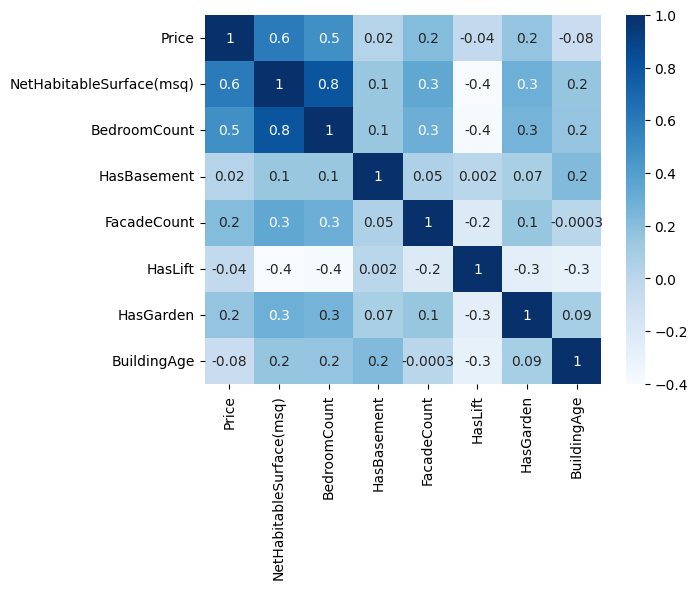

In [99]:
# corr.style.background_gradient(cmap='coolwarm')
corr = df.corr(method='spearman')
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

Detecting and dealing with outliers

In [100]:
df.shape

(13936, 20)

In [102]:

def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

In [103]:

col_names_toremove_outliers = ['Price', 'NetHabitableSurface(msq)',	'BedroomCount',	'FacadeCount',	'BuildingAge']
df_out=df
for col in col_names_toremove_outliers:
    df_out=  remove_outliers(df_out, col)




<Figure size 800x1000 with 0 Axes>

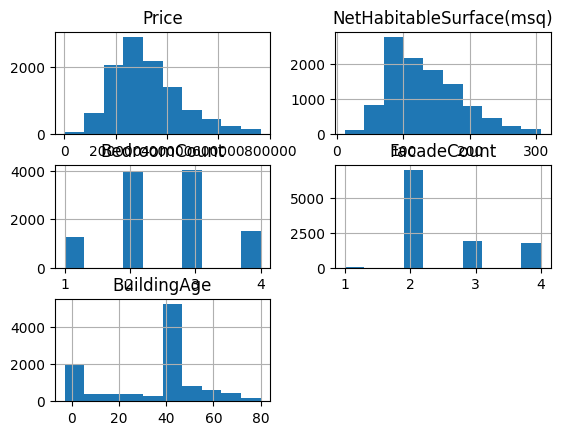

In [104]:
plt.figure(figsize=(8,10))
df_out.hist()
plt.show()

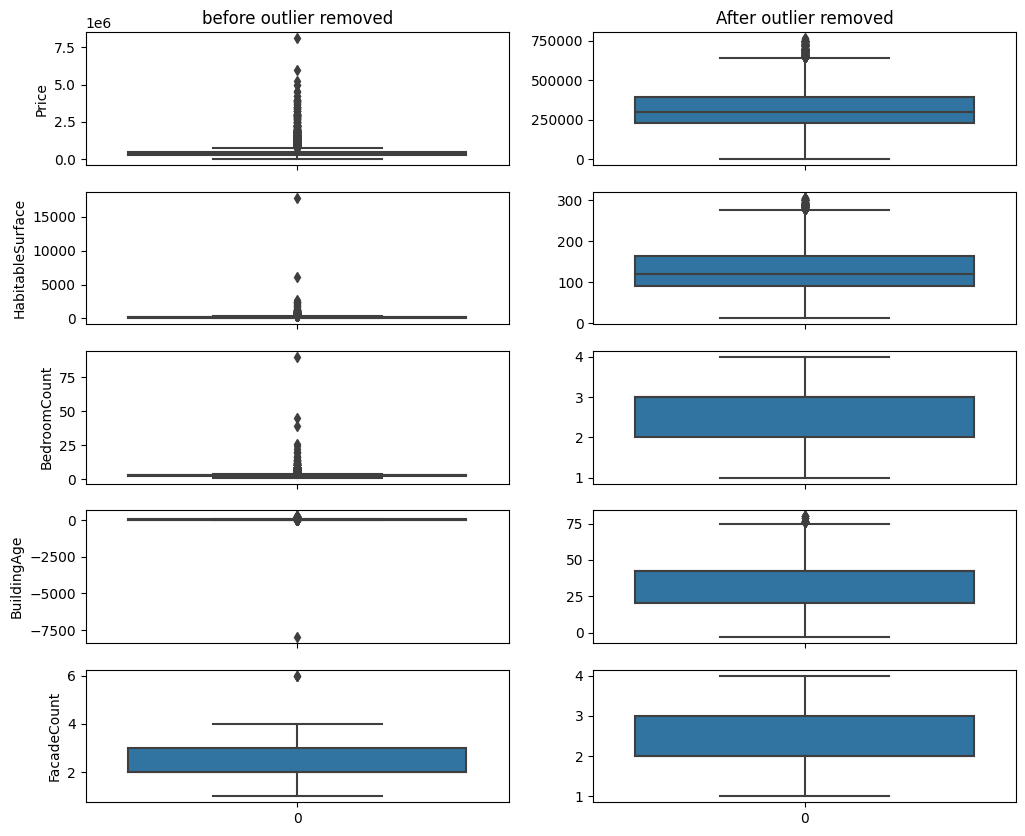

In [105]:
#['Price', 'NetHabitableSurface(msq)',	'BedroomCount',	'FacadeCount',	'BuildingAge']
from matplotlib.pyplot import xlabel


fig, axs = plt.subplots(5,2,figsize=(12,10), sharex=True)

ax1=  sns.boxplot(df['Price'], ax=axs[0][0])
ax1.set_title('before outlier removed')
ax1.set(ylabel='Price')
ax2=  sns.boxplot(df_out['Price'], ax=axs[0][1])
ax2.set_title('After outlier removed')

ax3=  sns.boxplot(df['NetHabitableSurface(msq)'], ax=axs[1][0])
ax4=  sns.boxplot(df_out['NetHabitableSurface(msq)'], ax=axs[1][1])
ax3.set(ylabel='HabitableSurface')

ax5=  sns.boxplot(df['BedroomCount'], ax=axs[2][0])
ax6=  sns.boxplot(df_out['BedroomCount'], ax=axs[2][1])
ax5.set(ylabel='BedroomCount')

ax7=  sns.boxplot(df['BuildingAge'], ax=axs[3][0])
ax8=  sns.boxplot(df_out['BuildingAge'], ax=axs[3][1])
ax7.set(ylabel='BuildingAge')

ax9=  sns.boxplot(df['FacadeCount'], ax=axs[4][0])
ax10=  sns.boxplot(df_out['FacadeCount'], ax=axs[4][1])
ax9.set(ylabel='FacadeCount')

# df.plot.box(sym="r+")

plt.show()


In [ ]:
cols_categorical = ['HasBasement', 'HasLift', 'FloodZoneType', 'HeatingType', 'IsDoubleGlaze', 'HasGarden', 'KitchekType', 'Province', 'locality', 'Region','BuildingCondition']


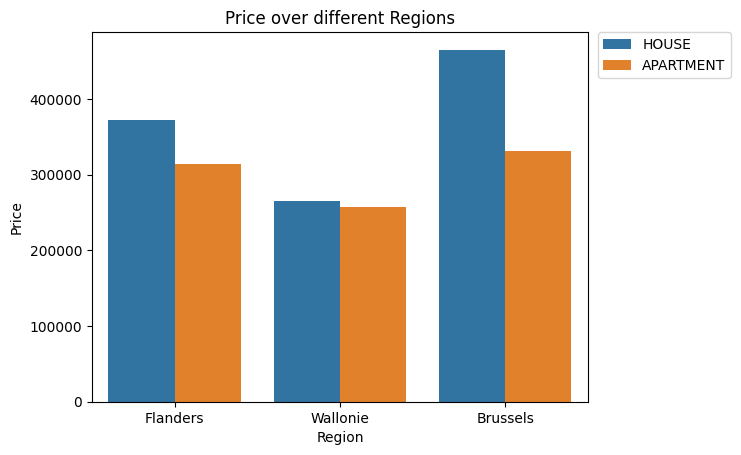

In [117]:
sns.barplot(data=df_out, x="Region", y="Price", hue='Type', errorbar=None)
plt.title('Price over different Regions')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [252]:
color_pal = ['#1b9e77', '#d95f02']

C:\Users\genet\AppData\Local\Temp\ipykernel_18536\2718830327.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', '2k','4k', '6k', '8k', '10k'])


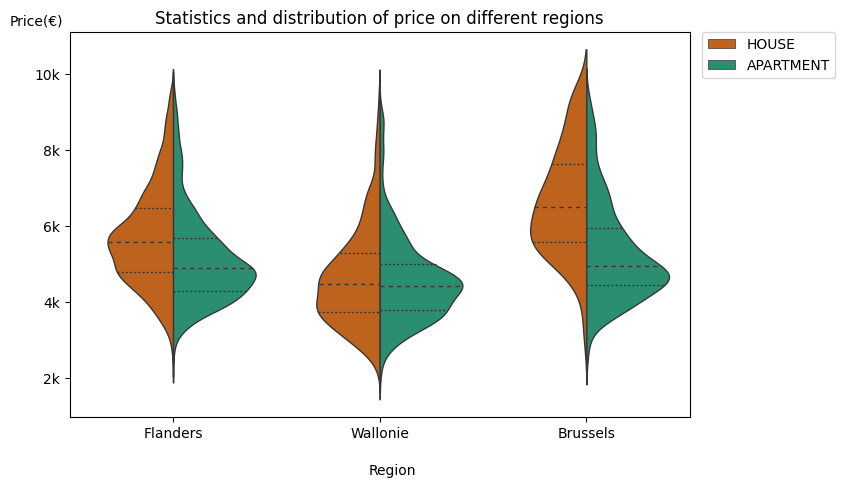

In [282]:
from tkinter import font


fig, ax = plt.subplots(figsize=(8,5))
sns.violinplot(data=df_out, x="Region", y="Price", hue='Type', split=True, inner="quart", linewidth=1, palette=color_pal)
ax.set_ylabel("Price("+"\u20AC)", loc="top", rotation="horizontal")
ax.set_yticklabels(['0', '2k','4k', '6k', '8k', '10k'])
ax.set_xlabel("Region")
ax.yaxis.set_label_coords(-.01, 1.01)
ax.xaxis.set_label_coords(.52, -.12)
plt.title('Statistics and distribution of price on different regions')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', borderaxespad=0)
#plt.ylabel("Price("+"\u20AC)", rotation=0)



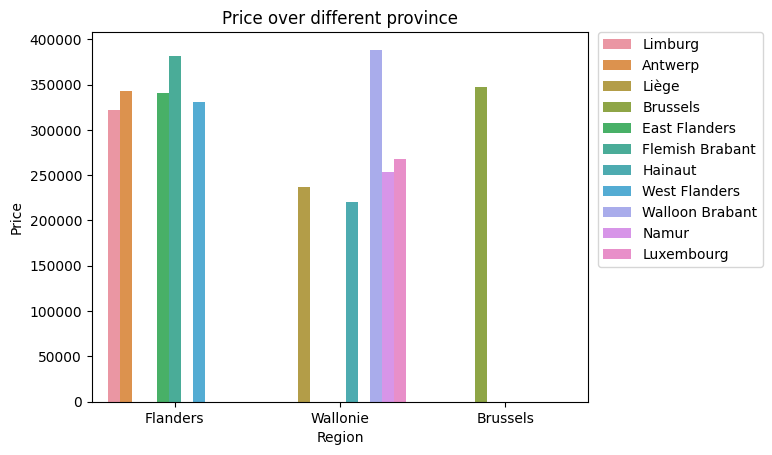

In [114]:
sns.barplot(data=df_out, x="Region", y="Price", hue='Province', errorbar=None)
plt.title('Price over different province')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


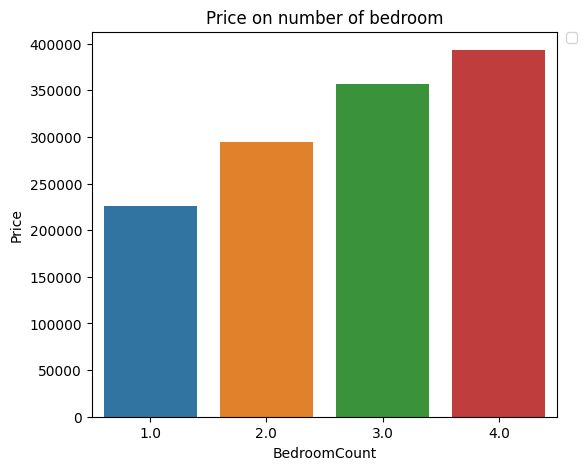

In [115]:
plt.figure(figsize=(6,5))
sns.barplot(data=df_out, x="BedroomCount", y="Price", errorbar=None)
plt.title('Price on number of bedroom')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


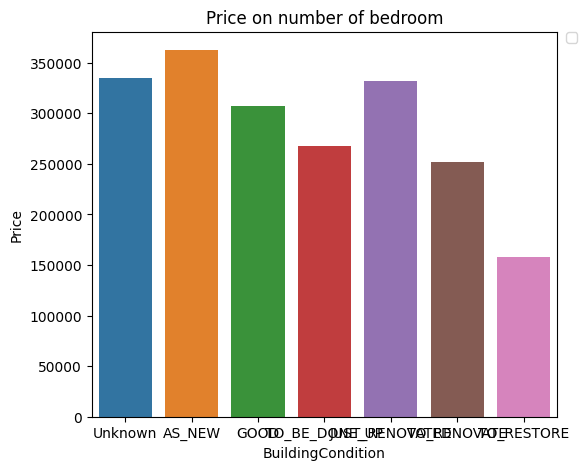

In [202]:

plt.figure(figsize=(6,5))
sns.barplot(data=df_out, x="BuildingCondition", y="Price", errorbar=None)
plt.title('Price on number of bedroom')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

C:\Users\genet\AppData\Local\Temp\ipykernel_18536\2277291733.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['0', '', '2k', '', '4k', '', '6k', '', '8k','', '10k'])


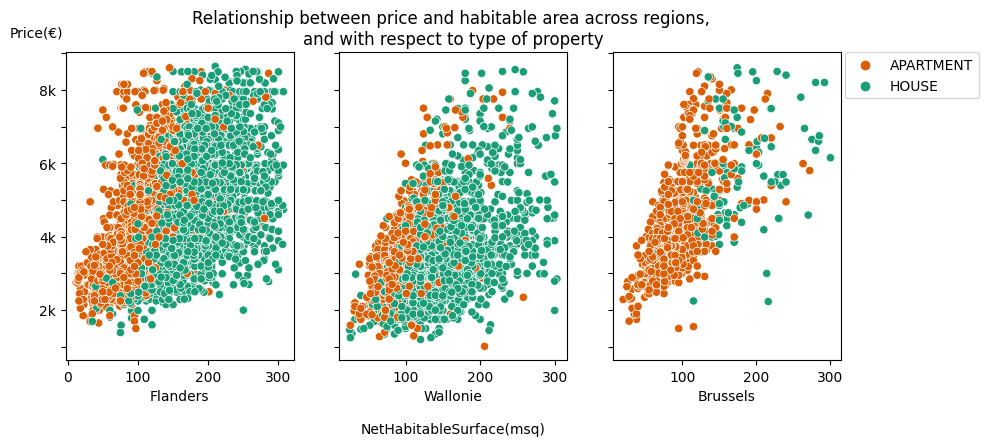

In [289]:
fig, ax = plt.subplots(1,3,figsize = (10,4), sharey=True)
hue_order=['APARTMENT', 'HOUSE']
sns.scatterplot(data=df_out[df_out['Region']=='Flanders'], x="NetHabitableSurface(msq)", y="Price", hue='Type', hue_order=hue_order, ax=ax[0], palette=color_pal[::])
sns.scatterplot(data=df_out[df_out['Region']=='Wallonie'], x="NetHabitableSurface(msq)", y="Price", hue='Type',hue_order=hue_order, ax=ax[1], palette=color_pal[::])
sns.scatterplot(data=df_out[df_out['Region']=='Brussels'], x="NetHabitableSurface(msq)", y="Price", hue='Type',hue_order=hue_order, ax=ax[2], palette=color_pal[::])

ax[0].set_yticklabels(['0', '', '2k', '', '4k', '', '6k', '', '8k','', '10k'])
ax[1].set_title('Relationship between price and habitable area across regions, \nand with respect to type of property')
ax[0].set_ylabel("Price("+"\u20AC)", loc="top", rotation="horizontal")

ax[0].yaxis.set_label_coords(-.01, 1.04)
# ax[1].xaxis.set_label_coords(.52, -.12)
ax[1].set_xlabel("Wallonie\n\nNetHabitableSurface(msq)")
ax[0].set_xlabel("Flanders")
ax[2].set_xlabel("Brussels")
ax[0].legend([],[],frameon=False)
ax[1].legend([],[],frameon=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [237]:
df_Flanders = df_out[df_out['Region']=='Flanders']

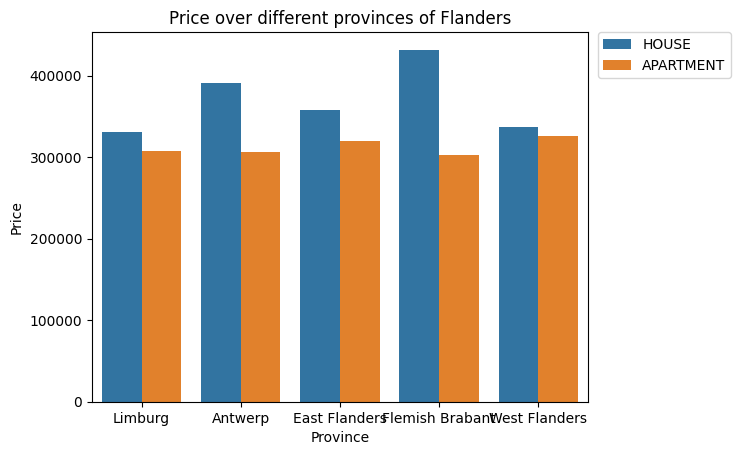

In [240]:
sns.barplot(data=df_Flanders, x="Province", y="Price", hue='Type', errorbar=None)
plt.title('Price over different provinces of Flanders')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Encoding categorical values

In [236]:
cols_categorical = ['HasBasement', 'HasLift', 'FloodZoneType', 'HeatingType', 'IsDoubleGlaze', 'HasGarden', 'KitchekType', 'Province', 'locality', 'Region','BuildingCondition']

# # df_out.HasBasement=df_out.HasBasement.astype('category').cat.codes
# df_out.HasLift=df_out.HasLift.astype('category').cat.codes
# df_out.FloodZoneType=df_out.FloodZoneType.astype('category').cat.codes
# df_out.HeatingType=df_out.HeatingType.astype('category').cat.codes
# df_out.BuildingCondition=df_out.BuildingCondition.astype('category').cat.codes
# df_out.IsDoubleGlaze=df_out.IsDoubleGlaze.astype('category').cat.codes
# df_out.HasGarden	=df_out.HasGarden.astype('category').cat.codes
# df_out.KitchekType	=df_out.KitchekType	.astype('category').cat.codes
# df_out.Province=df_out.Province.astype('category').cat.codes
# df_out.locality	=df_out.locality.astype('category').cat.codes
# df_out.Region	=df_out.Region	.astype('category').cat.codes



Label Encoding

LabelEncoder:This transformer should be used to encode TARGET values, i.e. y, and not the input X.
OneHotEncoder(Ideal for smaller gategory as the number of column increased by the number of category): The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are encoded using a one-hot (aka ‘one-of-K’ or ‘dummy’) encoding scheme. we might confuse the model into thinking that a column has data with some kind of order or hierarchy when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.

Label 

In [20]:
def encode_list(list_):
    encoder = preprocessing.OrdinalEncoder
    list_transformed = encoder.fit_transform(list_)
    list_transformed = le.transform(list_)
    return le, list_transformed

In [22]:
df.columns

Index(['Type', 'Sub type', 'Price', 'NetHabitableSurface(msq)', 'BedroomCount',
       'Province', 'locality', 'Region', 'PostCode', 'street',
       'BuildingCondition', 'ConstructionYear', 'FacadeCount', 'FloodZoneType',
       'HeatingType', 'IsDoubleGlaze', 'KitchekType'],
      dtype='object')

In [23]:
type_encoding, encoded_type_value = encode_list('Type')
subtype_encoding, encoded_province_value = encode_list('Sub type')
province_encoding, encoded_province_value = encode_list('Province')
locality_encoding, encoded_locality_value = encode_list('locality')
region_encoding, encoded_region_value = encode_list('Region')
postcode_encoding, encoded_postcode_value = encode_list('PostCode')
street_encoding, encoded_street_value = encode_list('street')
buildingCondition_encoding, encoded_buildingCondition_value = encode_list('BuildingCondition')
constructionYear_encoding, encoded_constructionYear_value = encode_list('ConstructionYear')
FacadeCount_encoding, encoded_FacadeCount_value = encode_list('FacadeCount')
floodzone_encoding, encoded_floodzone_value = encode_list('FloodZoneType')
heatingtype_encoding, encoded_heatingtype_value = encode_list('HeatingType')
isDoubleGlz_encoding, encoded_isDoubleGlz_value = encode_list('IsDoubleGlaze')
kitchenType_encoding, encoded_kitchentype_value = encode_list('KitchekType')          

TypeError: LabelEncoder.fit() missing 1 required positional argument: 'y'

In [93]:
def predict_value_forNAN(data, column_name):
    test = data[data[column_name].isna()]
    train = data.dropna()
    x_train = train.drop([column_name], axis=1)
    y_train = train[column_name]
    x_test = test.drop(column_name, axis=1)
    
    lr_model = lr(random_state=0)
    lr_model.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    return y_pred
    

In [94]:
predicted_values = predict_value_forNAN(df, 'Floor')
print(df.Floor.isna().sum())
df.loc[df['Floor'].isna(), 'Floor'] = predicted_values
print(df.Floor.isna().sum())

ValueError: could not convert string to float: 'APARTMENT'